<a href="https://colab.research.google.com/github/Shumookh/Best-selling-product/blob/main/Best_selling_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever felt anxious about not selling your products? Imagine you own a small store, and every month comes with questions: "What will be the best-selling product for the next month?" This has become a possible reality with the use of a technology called "neural networks." With past sales data, such as product types, months, and holidays, you won't feel anxious anymore; instead, you'll have time to improve your store and serve your customers better.

 Remember: Smart solutions can turn challenges into successes.

هل شعرت يومًا بالقلق من عدم بيع منتجاتك؟ تخيل أنك تمتلك متجرًا صغيرًا، وكل شهر يأتي ومعه تساؤلات: "ما هو المنتج الأكثر مبيعاً لشهر القادم؟"


 فقد أصبح هذا واقع ممكن بواسطة تقنية " الشبكة العصبية الإصطناعية"  وباستخدام بيانات المبيعات السابقة، مثل أنواع المنتجات، والشهور، وأيام العطلات.

 لن تشعر بالقلق بعد الآن، بل ستحصل على الوقت لتحسين متجرك وخدمة عملائك بشكل أفضل. تذكر: الحلول الذكية يمكن أن تحول التحديات إلى نجاحات

In [30]:
#------(Importing libraries)------#
#------(استدعاء المكتبات )------#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

In [31]:


#------(Reading the data)------#
#------( قراءة البيانات)------#
data = pd.read_csv('/content/dataset.csv')
data = data.dropna()

#------(Converting months to numbers)------#
#------(تحويل الشهور إلى أرقام)------#
data['Month'] = data['Month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12})
data['Product_Encoded'] = pd.factorize(data['Product'])[0]



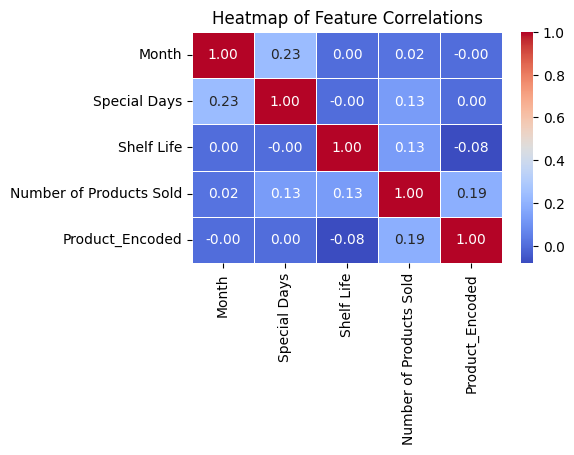

In [32]:
#------(Calculate correlation matrix)------#
#------(حساب مصفوفة الارتباط)------#
# The line  by completing the list of column names with proper quotes and brackets
correlation_matrix = data[['Month', 'Special Days', 'Shelf Life', 'Number of Products Sold', 'Product_Encoded']].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

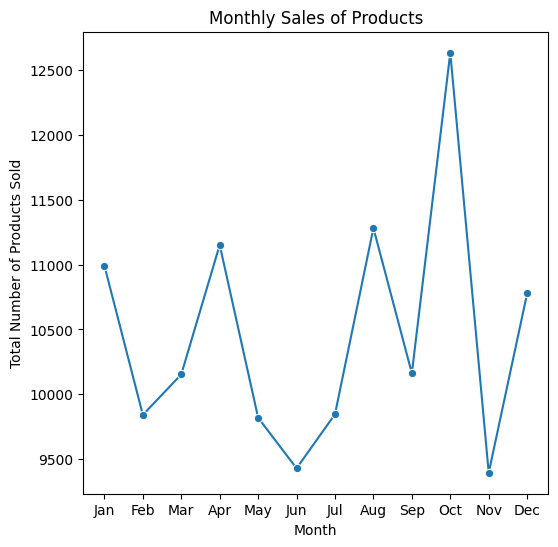

In [33]:
#-----(Line chart of monthly Sales)-----#
monthly_sales = data.groupby('Month')['Number of Products Sold'].sum().reset_index()
plt.figure(figsize=(6, 6))
sns.lineplot(x='Month', y='Number of Products Sold', data=monthly_sales, marker='o')
plt.title('Monthly Sales of Products')
plt.xlabel('Month')
plt.ylabel('Total Number of Products Sold')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

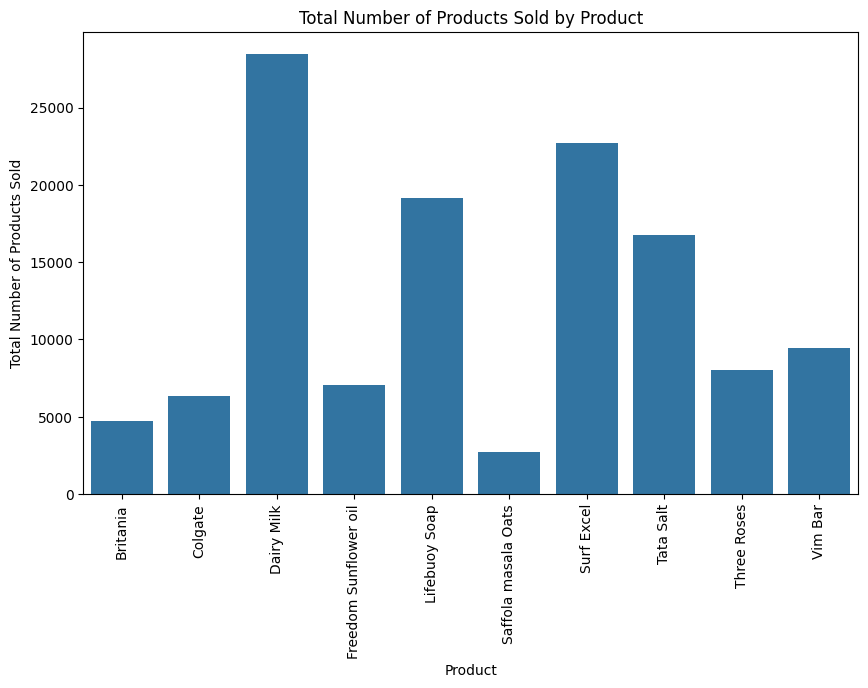

In [34]:
#-----(Bar chart of Number of Products Sold in each type products)-----#
product_sales = data.groupby('Product')['Number of Products Sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Number of Products Sold', data=product_sales)
plt.title('Total Number of Products Sold by Product')
plt.xlabel('Product')
plt.ylabel('Total Number of Products Sold')
plt.xticks(rotation=90)
plt.show()

In [35]:
#------(Separating features from the target variable)------#
#------(تحديد الميزات عن المتغير المستهدف)------#
X = data[['Product', 'Month', 'Special Days', 'Shelf Life']]
y = data['Number of Products Sold']

#------(Converting categorical features to numerical features)------#
#------(تحويل الميزات النوعية إلى ميزات رقمية)------#
X = pd.get_dummies(X, columns=['Product'], drop_first=True)

#------(Splitting the data into training and testing sets)------#
#------(تقسيم البيانات إلى مجموعة تدريب واختبار)------#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#------(Normalizing the data)------#
#------(تطبيع البيانات)------#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#------(Building the neural network model)------#
#------(بناء نموذج الشبكة العصبية)------#
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # طبقة الإخراج

#------(Compiling the neural network)------#
#------(تحميع الشبكة العصبية)------#
model.compile(optimizer='adam', loss='mean_squared_error')

#------(Training the neural network)------#
#------(تدريب الشبكة العصبية)------#
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

#------(Making predictions)------#
#------(إجراء التنبؤات)------#
y_pred = model.predict(X_test)

#------(Preparing new data for January with all products)------#
#------(إعداد بيانات جديدة لشهر يناير مع جميع المنتجات)------#
new_data = pd.DataFrame({
    'Month': [1] * (X.shape[1] - 3),
    'Special Days': [1] * (X.shape[1] - 3),
    'Shelf Life': [24] * (X.shape[1] - 3)})

#------(Adding product columns)------#
#------( إضافة أعمدة للمنتجات)------#
for col in X.columns:
    if col.startswith('Product_'):
        new_data[col] = 0

#------(Making predictions for each product)------#
#------(إجراء التنبؤ لكل منتج)------#
predictions = {}
for product in new_data.columns:
    if product.startswith('Product_'):
        new_data[product] = 1  # تعيين المنتج الحالي
        scaled_data = scaler.transform(new_data)  # تطبيع البيانات الجديدة
        predicted_sales = model.predict(scaled_data)
        predictions[product] = predicted_sales[0][0]  # تخزين النتيجة
        new_data[product] = 0  # إعادة تعيين المنتج

#------(Identifying the best-selling product)------#
#------(تحديد المنتج الأكثر مبيعًا)------#
best_selling_product = max(predictions, key=predictions.get)

#------(Calculating R^2)------#
#------(حساب R^2)------#
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

#------(Displaying the predicted best-selling product)------#
#------( اظهار المنتج الأكثر مبيعًا)------#
print(f"المنتج المتوقع الأكثر مبيعًا في شهر يناير القادم هو: {best_selling_product.replace('Product_', '')}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1750382.1250
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1506357.0000 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1514670.8750 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1515635.8750
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1536737.1250 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1553869.7500 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1581830.8750 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1316737.5000 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1564389.6250
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1058025.3750 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 977825.0625  
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 757417.5625  
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 374497.4062 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3